# Propagate TLEs with $\partial\textrm{SGP4}$

In this notebook, we show how to use $\partial \textrm{SGP4}$ for the propagation of two-line elements (TLE) data

In [1]:
import dsgp4
import torch

## Single TLE propagation

First, we tackle the case in which we have a given TLE, and we would like to propagate it at future time(s).

In [2]:
#we load all TLEs:
tles = dsgp4.tle.load("example.tle")
#we only extract the first one:
my_tle = tles[0]

In [3]:
#we always have to initialize the TLE before we can use it. If that does not, it can be directly initialized during propagation (with a small performance penalty):
dsgp4.util.initialize_tle(my_tle)

```{note}
In case the TLE has not been initialized, it is also possible to call the propagate method, and let it initialize it. For that, it is enough to pass the boolean flag `initialized` as `False` (otherwise, it defaults as `True`) 
```

In [4]:
#I propagate for 1 day:
tsinces = torch.linspace(0,24*60,10000)
state_teme=dsgp4.util.propagate(my_tle,tsinces)

<Axes3D: xlabel='X [km]', ylabel='Y [km]', zlabel='Z [km]'>

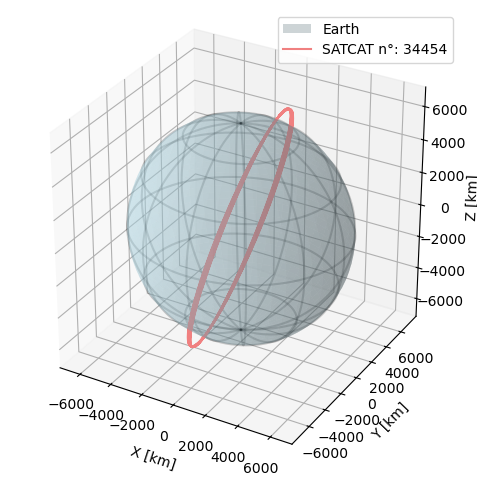

In [19]:
dsgp4.plot_orbit(state_teme,
                 color='lightcoral',
                 label=f'SATCAT n°: {my_tle.satellite_catalog_number}')

## Batch TLE propagation

Here, we show how to to propagate batches of TLEs in parallel

In [11]:
#we first need to prepare the data, the API requires that there are as many TLEs as times. Let us assume we want to
#propagate each of the 
tsinces = torch.cat([torch.linspace(0,24*60,10000)]*len(tles))
#first let's initialize them:
dsgp4.initialize_tle(tles)
#then let's construct the TLEs batch by making sure there are as many TLEs as times:
tles_batch=[]
for tle in tles:
    tles_batch+=[tle]*10000

In [13]:
#we propagate the batch of 3,000 TLEs for 1 day:
states_teme=dsgp4.propagate_batch(tles_batch,tsinces)

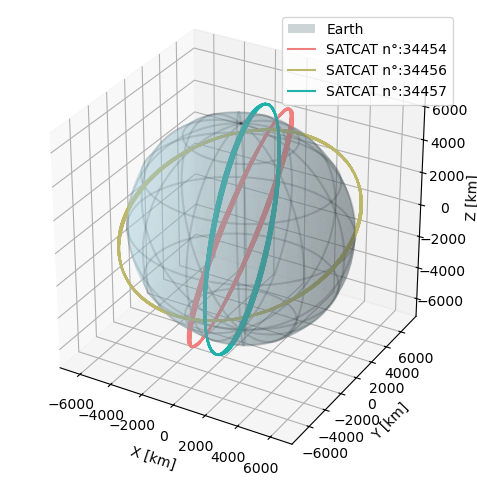

In [23]:
#Let's plot the first orbit:
ax=dsgp4.plot_orbit(states_teme[:10000],
                    color='lightcoral',
                    label=f'SATCAT n°:{tles[0].satellite_catalog_number}')
ax=dsgp4.plot_orbit(states_teme[10000:20000],
                    ax=ax, 
                    color='darkkhaki', 
                    label=f'SATCAT n°:{tles[1].satellite_catalog_number}')
ax=dsgp4.plot_orbit(states_teme[20000:],
                    ax=ax, 
                    color='lightseagreen', 
                    label=f'SATCAT n°:{tles[2].satellite_catalog_number}')